In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# set display env
pd.set_option('display.width', 300)
pd.set_option('display.max_columns', 300)

In [4]:
data = pd.read_csv('.\\car.data', header=None)
n_columns = len(data.columns)
columns = ['buy', 'maintain', 'doors', 'persons', 'boot', 'safety', 'accept']
new_columns = dict(list(zip(np.arange(n_columns), columns)))
data.rename(columns=new_columns, inplace=True)
print(data.head(10))

     buy maintain doors persons   boot safety accept
0  vhigh    vhigh     2       2  small    low  unacc
1  vhigh    vhigh     2       2  small    med  unacc
2  vhigh    vhigh     2       2  small   high  unacc
3  vhigh    vhigh     2       2    med    low  unacc
4  vhigh    vhigh     2       2    med    med  unacc
5  vhigh    vhigh     2       2    med   high  unacc
6  vhigh    vhigh     2       2    big    low  unacc
7  vhigh    vhigh     2       2    big    med  unacc
8  vhigh    vhigh     2       2    big   high  unacc
9  vhigh    vhigh     2       4  small    low  unacc


In [10]:
# 转成one-hot编码
x = pd.DataFrame()
for col in columns[:-1]:
    t = pd.get_dummies(data[col])
    t = t.rename(columns=lambda x: col+'_'+str(x))
    x = pd.concat((x, t), axis=1)
print(x.head(10))
y = np.array(pd.Categorical(data['accept']).codes)

   buy_high  buy_low  buy_med  buy_vhigh  maintain_high  maintain_low  maintain_med  maintain_vhigh  doors_2  doors_3  doors_4  doors_5more  persons_2  persons_4  persons_more  boot_big  boot_med  boot_small  safety_high  safety_low  safety_med
0         0        0        0          1              0             0             0               1        1        0        0            0          1          0             0         0         0           1            0           1           0
1         0        0        0          1              0             0             0               1        1        0        0            0          1          0             0         0         0           1            0           0           1
2         0        0        0          1              0             0             0               1        1        0        0            0          1          0             0         0         0           1            1           0           0
3         0        0

In [16]:
x, x_test, y, y_test = train_test_split(x, y, train_size=0.7)
clf = LogisticRegressionCV(Cs=np.logspace(-3, 4, 8), cv=5)
clf.fit(x, y)
print(clf.C_)
y_hat = clf.predict(x)
print('训练集精确度：', metrics.accuracy_score(y, y_hat))
y_test_hat = clf.predict(x_test)
print('测试集精确度：', metrics.accuracy_score(y_test, y_test_hat))

[  1.00000000e+00   1.00000000e-03   1.00000000e+01   1.00000000e+01]
训练集精确度： 0.944444444444
测试集精确度： 0.865168539326


In [12]:
n_class = len(np.unique(y))
if n_class > 2:
    y_test_one_hot = label_binarize(y_test, classes=np.arange(n_class))
    y_test_one_hot_hat = clf.predict_proba(x_test)
    fpr, tpr, _ = metrics.roc_curve(y_test_one_hot.ravel(), y_test_one_hot_hat.ravel())
    print('Micro AUC:\t', metrics.auc(fpr, tpr))
    auc = metrics.roc_auc_score(y_test_one_hot, y_test_one_hot_hat, average='micro')
    print('Micro AUC(System):\t', auc)
    auc = metrics.roc_auc_score(y_test_one_hot, y_test_one_hot_hat, average='macro')
    print('Macro AUC:\t', auc)
else:
    fpr, tpr, _ = metrics.roc_curve(y_test.ravel(), y_test_hat.ravel())
    print('AUC:\t', metrics.auc(fpr, tpr))
    auc = metrics.roc_auc_score(y_test, y_test_hat)
    print('AUC(System):\t', auc)

Micro AUC:	 0.9782856464
Micro AUC(System):	 0.9782856464
Macro AUC:	 0.941218832491


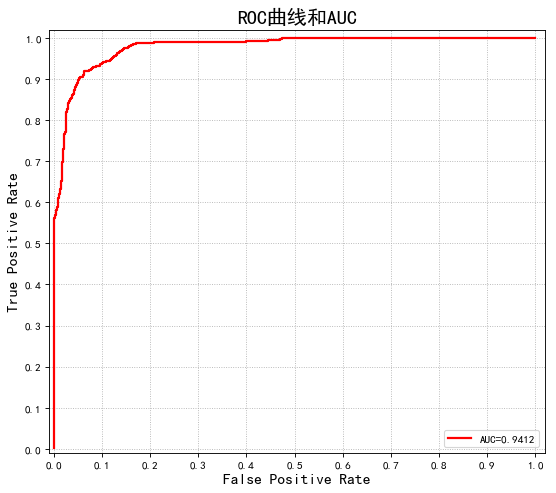

In [13]:
# plot
mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 7), dpi=80, facecolor='w')
plt.plot(fpr, tpr, 'r-', lw=2, label='AUC=%.4f' % auc)
plt.legend(loc='lower right')
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.grid(b=True, ls=':')
plt.title('ROC曲线和AUC', fontsize=18)
plt.show()